In [2]:
import numpy as np


def divide_rect_in_two(x, y, w, h):
  """
  주어진 직사각형을 균일하게 통과하는 임의의 직선을 샘플링합니다.
  직사각형은 좌측 상단 점 (x, y)를 기준으로 정의됩니다.

  Args:
      rect_params (tuple): (x, y, width, height) 형식의 직사각형 파라미터.
                            (x, y)는 좌측 상단 모서리의 좌표입니다.

  Returns:
      tuple: 직선을 정의하는 두 점 (p1, p2)의 튜플.
              각 점은 (x, y) 좌표 튜플입니다.
  """
  perimeter = 2 * (w + h)

  # 둘레 상의 한 점의 좌표를 계산하는 내부 함수 (좌측 상단 기준)
  def get_point_on_perimeter(distance):
    if distance < w:
      # 1. 상단 (Top edge): 좌 -> 우
      return (x + distance, y), 1
    elif distance < w + h:
      # 2. 우측 (Right edge): 상 -> 하
      return (x + w, y + (distance - w)), 2
    elif distance < 2 * w + h:
      # 3. 하단 (Bottom edge): 우 -> 좌
      return (x + w - (distance - (w + h)), y + h), 3
    else:
      # 4. 좌측 (Left edge): 하 -> 상
      return (x, y + h - (distance - (2 * w + h))), 4

  # 둘레 위에서 서로 다른 두 개의 랜덤한 거리를 선택
  while True:
    d1, d2 = np.random.uniform(0, perimeter, 2)
    p1, side1 = get_point_on_perimeter(d1)
    p2, side2 = get_point_on_perimeter(d2)
    # 두 점 사이의 거리가 매우 작으면 다시 샘플링
    if side1 != side2 and np.linalg.norm(np.array(p1) - np.array(p2)) > 1e-6:
      p1, p2 = np.asarray(p1), np.asarray(p2)
      d = p2 - p1
      a = -p1
      p = np.dot(a, d) / np.dot(d, d) * d
      return p1 + p

In [5]:
divide_rect_in_two(0, 0, 20, 10)

array([-1.92817043,  2.74579885])

In [7]:
from PIL import Image

img = Image.open("img.jpg")
width, height = img.size
reduce_num = 10
img = img.resize((int(width/reduce_num), int(height/reduce_num)))

[[  0.      0.   ]
 [ 47.875   0.   ]
 [ 95.75    0.   ]
 [143.625   0.   ]
 [191.5     0.   ]
 [239.375   0.   ]
 [287.25    0.   ]
 [335.125   0.   ]
 [383.      0.   ]
 [  0.     43.   ]
 [ 47.875  43.   ]
 [ 95.75   43.   ]
 [143.625  43.   ]
 [191.5    43.   ]
 [239.375  43.   ]
 [287.25   43.   ]
 [335.125  43.   ]
 [383.     43.   ]
 [  0.     86.   ]
 [ 47.875  86.   ]
 [ 95.75   86.   ]
 [143.625  86.   ]
 [191.5    86.   ]
 [239.375  86.   ]
 [287.25   86.   ]
 [335.125  86.   ]
 [383.     86.   ]
 [  0.    129.   ]
 [ 47.875 129.   ]
 [ 95.75  129.   ]
 [143.625 129.   ]
 [191.5   129.   ]
 [239.375 129.   ]
 [287.25  129.   ]
 [335.125 129.   ]
 [383.    129.   ]
 [  0.    172.   ]
 [ 47.875 172.   ]
 [ 95.75  172.   ]
 [143.625 172.   ]
 [191.5   172.   ]
 [239.375 172.   ]
 [287.25  172.   ]
 [335.125 172.   ]
 [383.    172.   ]
 [  0.    215.   ]
 [ 47.875 215.   ]
 [ 95.75  215.   ]
 [143.625 215.   ]
 [191.5   215.   ]
 [239.375 215.   ]
 [287.25  215.   ]
 [335.125 21

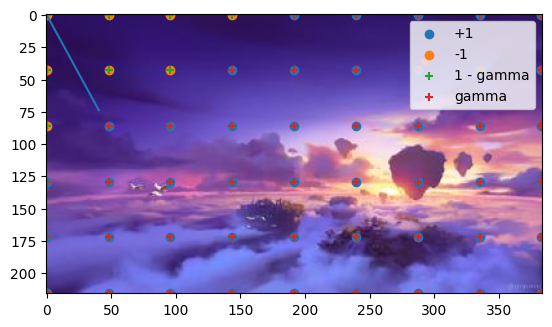

In [16]:
import matplotlib.pyplot as plt


observation = Image.open("img.jpg")
observation = np.asarray(observation)
# observation = np.ones((6, 9, 3), dtype=np.uint8)
# observation[:, :, :] = [255, 0, 0]
h, w, _ = observation.shape


cuts = np.array(list(
    divide_rect_in_two(
    x=0, y=0, w=width, h=height,
    )
    for _ in range(5_000)
))

fig, ax = plt.subplots()
ax.set_aspect("equal")

ax.imshow(observation)
u = cuts[0]
# print(p1, p2)
ax.plot([0, u[0]], [0, u[1]])
# ax.plot([p1[0], p2[0]], [p1[1], p2[1]])

x = np.linspace(0, w - 1, 9)
y = np.linspace(0, h - 1, 6)
xx, yy = np.meshgrid(x, y)
v = np.column_stack([xx.flatten(), yy.flatten()])

print(v)

dot = np.dot(v - u[np.newaxis, ...], u)
vv = v[dot > 0]
ax.scatter(vv[:, 0], vv[:, 1], label=f"+1")
vv = v[dot < 0]
ax.scatter(vv[:, 0], vv[:, 1], label=f"-1")

z = -1
test = z * dot
vv = v[test > 0]
ax.scatter(vv[:, 0], vv[:, 1], marker="+", label=f"1 - gamma")
vv = v[test < 0]
ax.scatter(vv[:, 0], vv[:, 1], marker="+", label=f"gamma")
# vv = v[test < 0]
# z = -1
# vv = v[test <= 0]
# ax.scatter(vv[:, 0], vv[:, 1], label=f"{z}")

ax.legend()


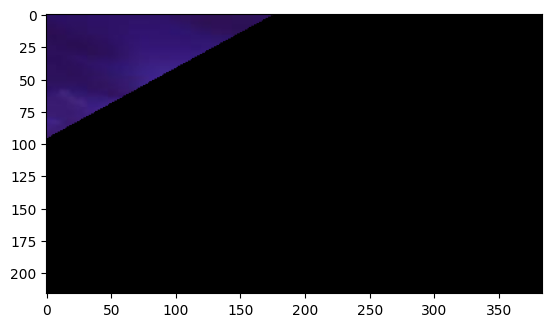

In [17]:
import itertools

def get_query(observation, cut):

  observation = np.array(observation)
  h, w, *_ = observation.shape
  xx, yy = np.meshgrid(np.arange(w), np.arange(h))
  index = np.column_stack([xx.flatten(), yy.flatten()])
  dot = np.dot(index.astype(float) - cut[np.newaxis, ...], cut)

  observation_p = np.array(observation)
  at = index[dot < 0]
  observation_p[at[:, 1], at[:, 0]] = 0
  observation_n = np.array(observation)
  at = index[dot >= 0]
  observation_n[at[:, 1], at[:, 0]] = 0

  return observation_p, observation_n

op, on = get_query(observation, cut=u)
plt.imshow(on)

[[[ 42  18  96 255]
  [ 42  18  96 255]
  [ 42  17  98 255]
  ...
  [ 49  23  97 255]
  [ 49  23  97 255]
  [ 49  23  97 255]]

 [[ 42  18  96 255]
  [ 42  18  96 255]
  [ 42  17  98 255]
  ...
  [ 49  23  97 255]
  [ 49  23  97 255]
  [ 49  23  97 255]]

 [[ 44  17  96 255]
  [ 44  17  96 255]
  [ 44  17  96 255]
  ...
  [ 49  22  99 255]
  [ 49  22  99 255]
  [ 49  22  99 255]]

 ...

 [[ 61  39 112 255]
  [ 61  39 112 255]
  [ 61  39 112 255]
  ...
  [ 78  64 151 255]
  [ 85  69 158 255]
  [ 91  75 164 255]]

 [[ 56  34 106 255]
  [ 56  34 106 255]
  [ 55  33 105 255]
  ...
  [ 79  65 152 255]
  [ 86  70 158 255]
  [ 92  76 164 255]]

 [[ 53  32 101 255]
  [ 52  31 100 255]
  [ 52  31 100 255]
  ...
  [ 76  62 149 255]
  [ 86  70 158 255]
  [ 84  68 156 255]]]


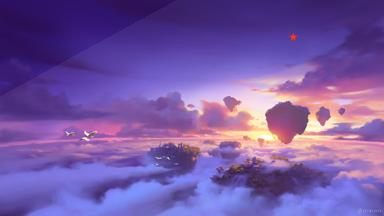

In [20]:
def highlight(observation, cut, side):

  observation = Image.fromarray(observation)
  observation = observation.convert("RGBA")
  observation = np.array(observation)
  print(observation)
  h, w, *_ = observation.shape
  xx, yy = np.meshgrid(np.arange(w), np.arange(h))
  index = np.column_stack([xx.flatten(), yy.flatten()])
  dot = np.dot(index.astype(float) - cut[np.newaxis, ...], cut)
  if side == +1:
    at = index[dot >= 0]
  else:
    at = index[dot < 0]
  overlay = np.zeros_like(observation)
  overlay[at[:, 1], at[:, 0]] = [255, 255, 255, 15]

  combined = Image.alpha_composite(Image.fromarray(observation), Image.fromarray(overlay))
  return combined

highlight(observation, cut=u, side=+1)

In [21]:
def compute_factor(x, cut, side, discount):
  # x: (d,)
  # cut: (d,)
  # side: ()
  test = side * np.dot(x - cut, cut)
  if test >= 0:
    return 1 - discount
  else:
    return discount

def belief_update_factor(x, cut, side, discount):
  X = x[..., *((np.newaxis,) * len(cut.shape[:-1])), :]
  Cut = cut[*((np.newaxis,) * len(x.shape[:-1])), ..., :]
  test = side * ((X - Cut) * Cut).sum(axis=-1)
  return np.where(test >= 0, 1.0 - discount, 0.0)
  # print(np.dot(X - Cut, Cut).shape)
  # print(x[..., *((np.newaxis,) * len(cut.shape[:-1])), :].shape)
  # print(cut[*((np.newaxis,) * len(x.shape[:-1])), ..., :].shape)

belief_update_factor(np.ones((1,2,3,2)), np.ones((4,5,6,7,2)), np.ones((4,5,6,7)), 0.3)

array([[[[[[[0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7]],

           [[0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7]],

           [[0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7]],

           [[0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0.7, 0.7, 0.7, ..., 0.7, 0.7, 0.7],
            [0